# Analyse de signaux synthétiques

## Transformée de Fourier

In [61]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from function import *
import waveletFunctions as wav
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 17

In [59]:
N = int(1e3)
T = 10
A0 = 10
f0 = 0.5
dt = T/N
A1 = 8
f1 = 1

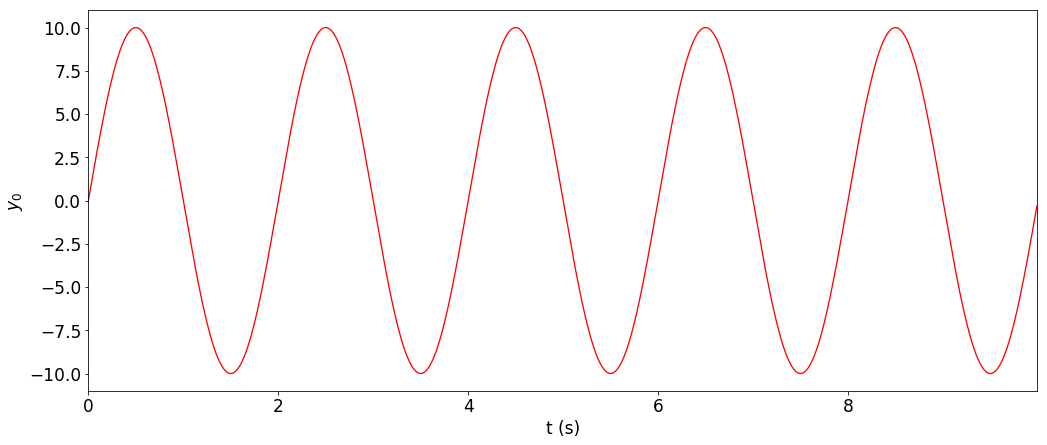

In [60]:
t = np.arange(N) * dt
y = y0(t, A0, f0)
plt.plot(t, y, color='red', linewidth=1.3)
plt.xlabel(r't (s)')
plt.ylabel(r'$y_{0}$')
plt.xlim([np.min(t), np.max(t)])
plt.show()

### Implémentation manuelle

In [56]:
%%timeit
PSDy0 = 2*T*np.abs(fdft(y))**2

78.4 ms ± 348 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
%%timeit
PSDy0 = 2*T*np.abs(dft(y))**2

3.24 s ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


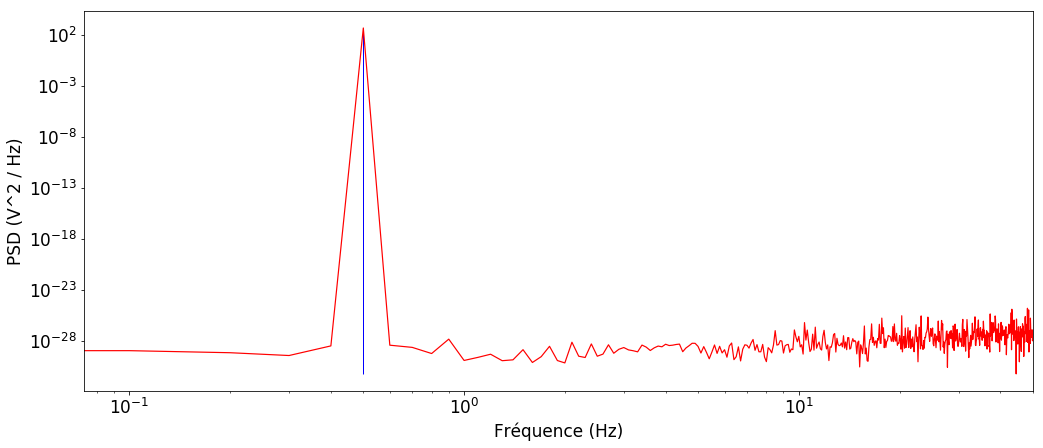

In [58]:
PSDy0 = 2*T*np.abs(fdft(y))**2
freqy0 = dftfreq(N, T)
plt.close()
plt.loglog(freqy0, PSDy0, linewidth=1.2, color='red')
plt.xlim((np.min(freqy0), np.max(freqy0)))
plt.vlines(f0, np.min(PSDy0), np.max(PSDy0), color='blue', linewidth=1)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD (V^2 / Hz)')
plt.show()

### Avec numpy.fft

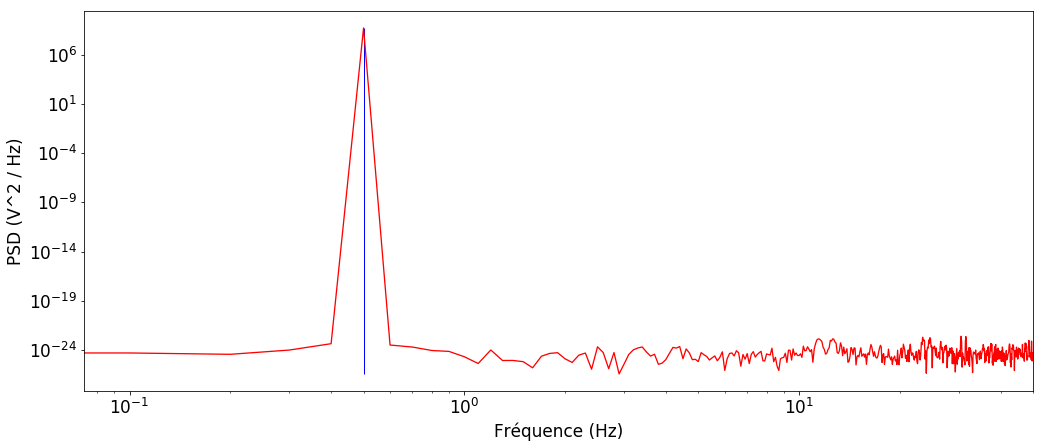

In [15]:
spectrum = 2*T*np.abs(np.fft.rfft(y))**2
freq = np.fft.rfftfreq(N, dt)
plt.close()
plt.loglog(freq, spectrum, color='red', linewidth=1.3)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD (V^2 / Hz)')
plt.xlim((np.min(freq), np.max(freq)))
plt.vlines(f0, np.min(spectrum), np.max(spectrum), color='blue', linewidth=1)
plt.show()

### Autres signaux

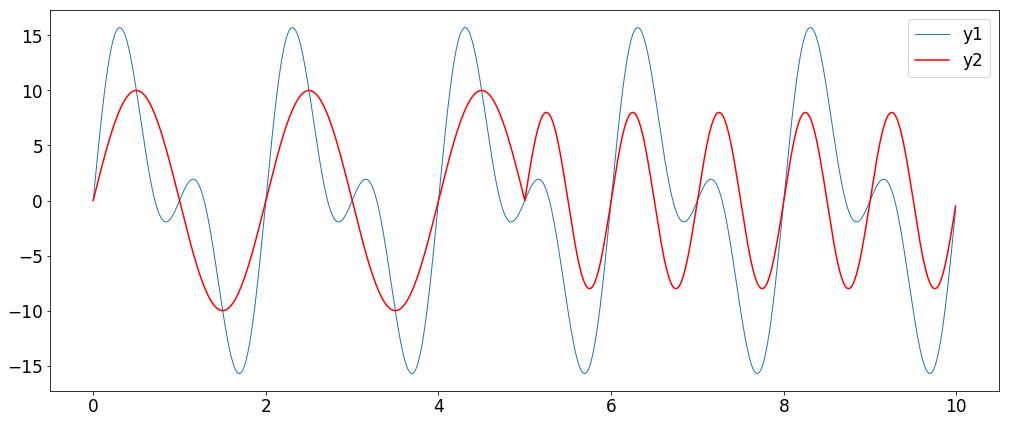

In [17]:
plt.close()
plt.plot(t, y1(t, A0, A1, f0, f1), label='y1', linewidth=1)
plt.plot(t, y2(t, A0, A1, f0, f1, T), color='red', label='y2')
plt.legend()
plt.show()

#### Transformée de y1 

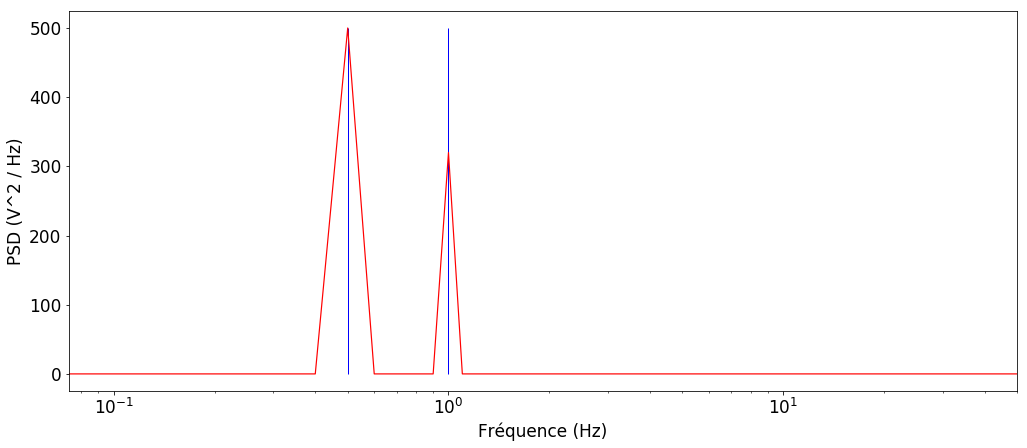

In [18]:
PSDy1 = 2*T*np.abs(dft(y1(t, A0, A1, f0, f1)))**2
freqy1 = dftfreq(N, T)
plt.close()
plt.semilogx(freqy1, PSDy1, linewidth=1.2, color='red')
plt.xlim((np.min(freqy1), np.max(freqy1)))
plt.vlines([f0, f1], np.min(PSDy1), np.max(PSDy1), color='blue', linewidth=1)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD (V^2 / Hz)')
plt.show()

#### Transformée de y2

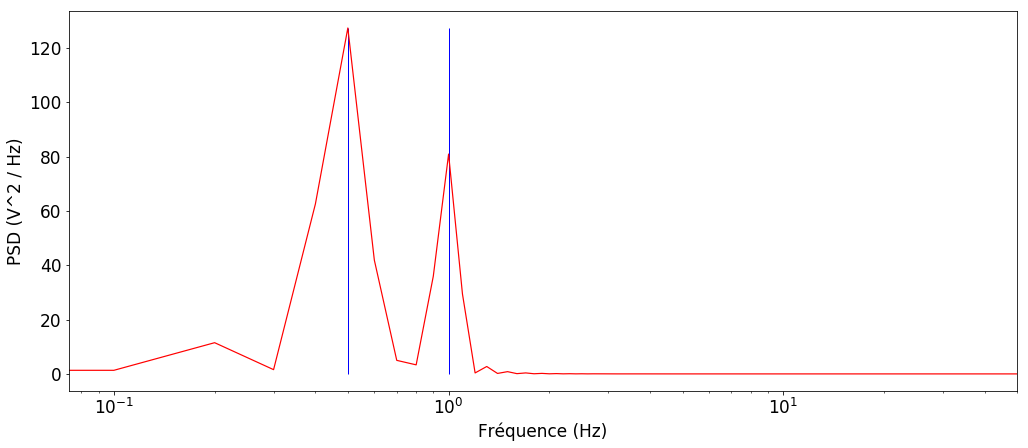

In [19]:
PSDy2 = 2*T*np.abs(dft(y2(t, A0, A1, f0, f1, T)))**2
freqy2 = dftfreq(N, T)
plt.close()
plt.semilogx(freqy2, PSDy2, linewidth=1.2, color='red')
plt.xlim((np.min(freqy2), np.max(freqy2)))
plt.vlines([f0, f1], np.min(PSDy2), np.max(PSDy2), color='blue', linewidth=1)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD (V^2 / Hz)')
plt.show()

Les deux transformées sont indiscernables (avec le bruit) !

## Résumé de l'analyse

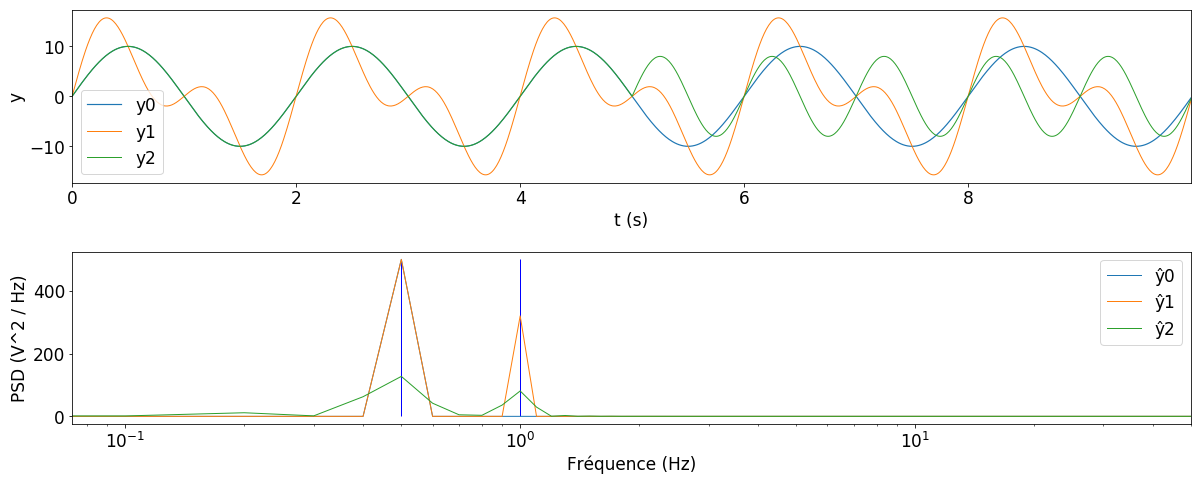

In [22]:
plt.close()
fig = plt.figure()
plt.subplot(211)
plt.plot(t, y0(t, A0, f0), linewidth=1.2, label='y0')
plt.plot(t, y1(t, A0, A1, f0, f1), linewidth=1, label='y1')
plt.plot(t, y2(t, A0, A1, f0, f1, T), linewidth=1, label='y2')
plt.xlabel(r't (s)')
plt.ylabel(r'y')
plt.xlim((np.min(t), np.max(t)))
plt.legend()

plt.subplot(212)
plt.semilogx(freqy0, PSDy0, linewidth=1, label='ŷ0')
plt.semilogx(freqy1, PSDy1, linewidth=1, label='ŷ1')
plt.semilogx(freqy2,PSDy2, linewidth=1, label='ŷ2')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD (V^2 / Hz)')
plt.xlim((np.min(freqy0), np.max(freqy1)))
plt.legend()
plt.vlines((f0, f1), 0, 500, linewidth=1, color='blue')
plt.tight_layout()

## Transformée en ondelettes

In [24]:
wave, period, scale, coi = wav.wavelet(y0(t, A0, f0), dt)
print(wave.shape, period.shape, scale.shape, y0(t, A0, f0).shape)

(36, 1000) (36,) (36,) (1000,)


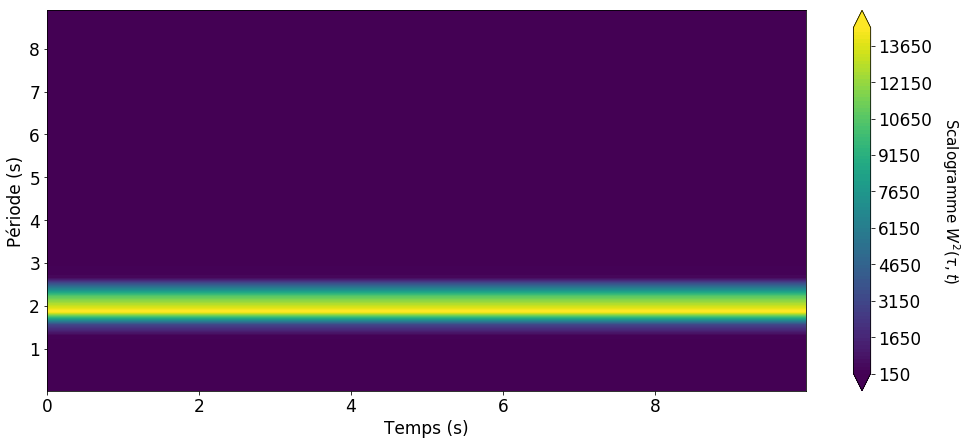

In [33]:
plt.close()
contour_plot = plt.contourf(t, period, np.abs(wave)**2, 100, extend='both')
plt.xlabel('Temps (s)')
plt.ylabel('Période (s)')
cbar = plt.colorbar(contour_plot)
cbar.set_label(r'Scalogramme $W^{2}(\tau,t)$', rotation=270, labelpad=30, fontsize=15)
plt.show()

In [26]:
wave1, period1, scale1, coi1 = wav.wavelet(y1(t, A0, A1, f0, f1), dt)
wave2, period2, scale2, coi2 = wav.wavelet(y2(t, A0, A1, f0, f1, T), dt)

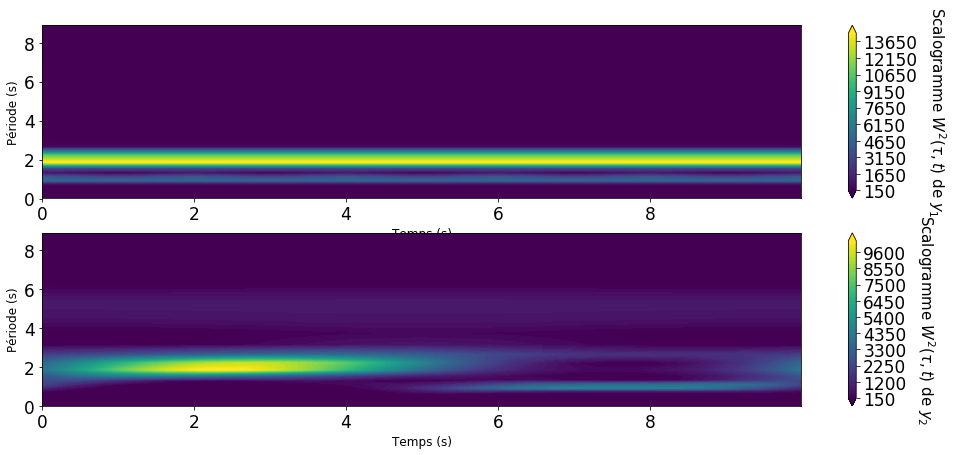

In [27]:
plt.close()
plt.subplot(211)
contour_plot = plt.contourf(t, period1, np.abs(wave1)**2, 100, extend='both')
plt.xlabel('Temps (s)', fontsize=12)
plt.ylabel('Période (s)', fontsize=12)
cbar = plt.colorbar(contour_plot)
cbar.set_label(r'Scalogramme $W^{2}(\tau,t)$ de $y_{1}$', rotation=270, labelpad=30, fontsize=15)

plt.subplot(212)
contour_plot = plt.contourf(t, period2, np.abs(wave2)**2, 100, extend='both')
plt.xlabel('Temps (s)', fontsize=12)
plt.ylabel('Période (s)', fontsize=12)
cbar = plt.colorbar(contour_plot)
cbar.set_label(r'Scalogramme $W^{2}(\tau,t)$ de $y_{2}$', rotation=270, labelpad=30, fontsize=15)
plt.show()

On intègre le scalogramme sur la variable temporelle. On obtient alors le spectre des fluctuations.

In [66]:
spWy1 = np.sum(np.abs(wave1)**2, axis=1)/wave1.shape[1]

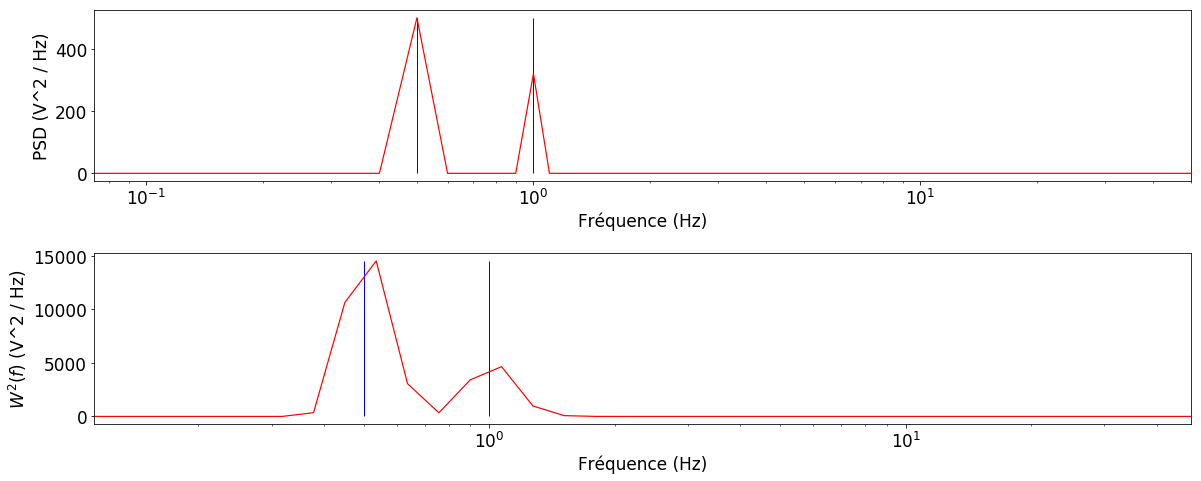

In [74]:
plt.close()
plt.subplot(211)
plt.semilogx(freqy1, PSDy1, linewidth=1.2, color='red')
plt.xlim((np.min(freqy1), np.max(freqy1)))
plt.vlines([f0, f1], np.min(PSDy1), np.max(PSDy1), color='blue', linewidth=1)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD (V^2 / Hz)')

plt.subplot(212)
plt.semilogx(1/period1, spWy1, linewidth=1.2, color='red')
plt.vlines([f0, f1], np.min(spWy1), np.max(spWy1), color='blue', linewidth=1)
plt.xlim(np.min(1/period1), np.max(1/period1))
plt.xlabel('Fréquence (Hz)')
plt.ylabel(r'$W^{2}(f)$ (V^2 / Hz)')
plt.tight_layout()